# Noise generation

In [1]:
import pandas as pd
from utils import import_df
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from utils import export_df

df = import_df("2-data-generation-output.json")
df_base = df.copy()
df.head()

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956,working-engine-1
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103,working-engine-1
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103,working-engine-1
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632,working-engine-1
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089,working-engine-1


In [2]:
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]
df = df.drop("label", axis=1)

for col in df.columns:
    std = statistics.stdev(df[col])
    noise = np.random.normal(0, std, len(df))
    df[col] += noise
    
df["label"] = df_base.label

In [3]:
export_df(df, "3-noise-generation-output.json")

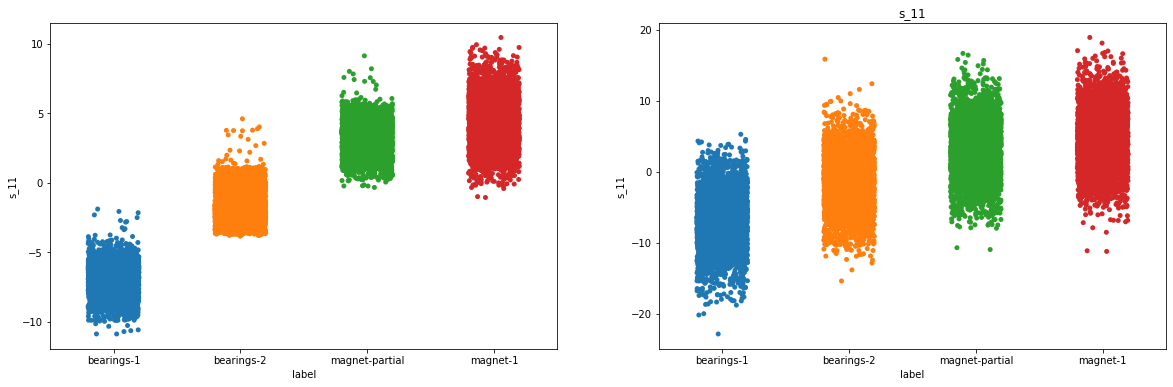

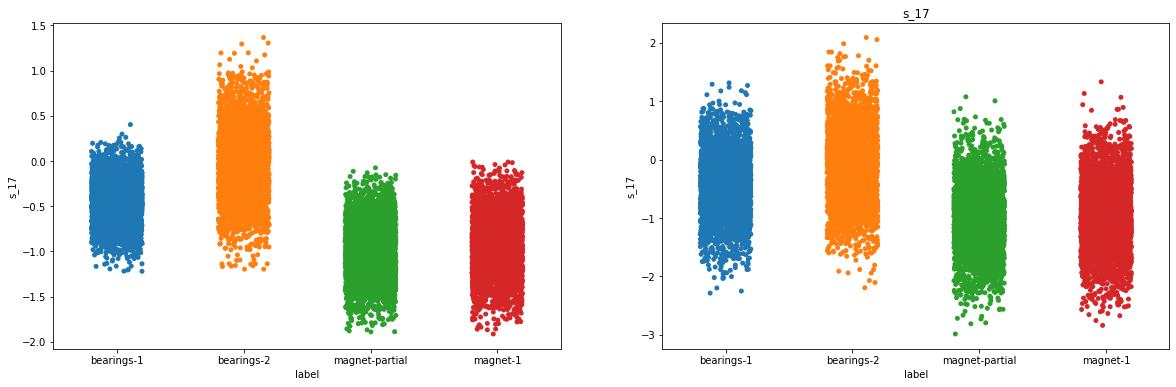

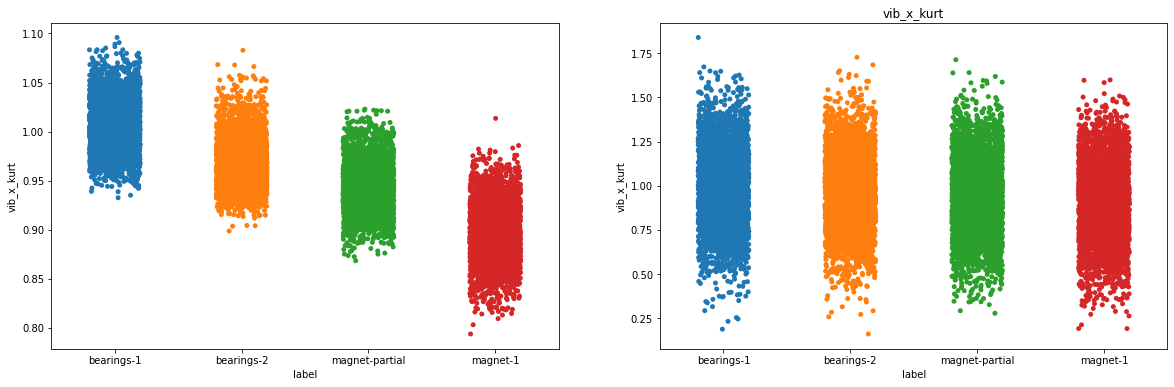

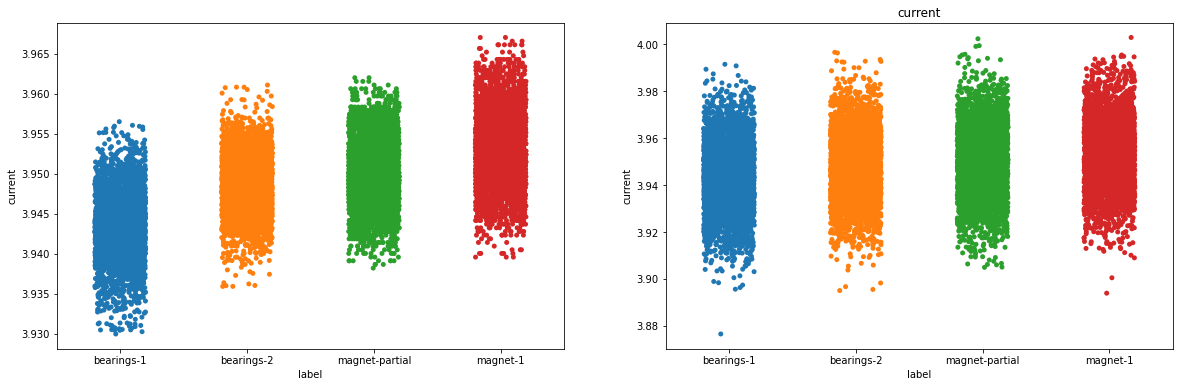

In [4]:
df = df[df.label.isin(['bearings-1', 'bearings-2', 'magnet-partial', 'magnet-1'])]
# for col in df.columns[1:-1]:
for col in 's_11', 's_17', 'vib_x_kurt', 'current': # df.columns[1:-1]
    fig, (ax1, ax2) = plt.subplots(1,2)
    sns.stripplot(x="label", y=col, data=df_base, jitter=0.2, c=c, order=df.label.unique(), ax=ax1)
    sns.stripplot(x="label", y=col, data=df, jitter=0.2, c=c, order=df.label.unique(), ax=ax2)
    fig.set_size_inches(20, 6)
    plt.title(col)
    plt.show()